# ESTUDIO CARACTERÍSTICAS  PRINCIPALES RECURSO FOTOVOLTAICO MEGAPARK SS REYES


En el seno de un proyecto de instalación de un sistema fotovoltaico de marquesinas solares y fotolinera se estudia las características del recurso fotovoltaico.

Primero se importan las librearias a utilizar

In [1]:
import numpy as np
from pvlib import location
from pvlib import irradiance
import pandas as pd
import matplotlib.pyplot as plt

Se define una función para obtener las características de la irradiación para un lugar y módulo

In [2]:
def get_data_location(caracteristics,caracteristics_module,date):
    site = location.Location(caracteristics['lat'], 
                             caracteristics['lon'],
                            caracteristics['tz'])                                                      
    times = pd.date_range(date, freq='60min', periods=24,
                      tz=site.tz)
    clearsky = site.get_clearsky(times)
    solar_position = site.get_solarposition(times)
    
    
    total_irrad=irradiance.get_total_irradiance( 
    surface_tilt=caracteristics_module['tilt'],
    surface_azimuth=caracteristics_module['surface_azimuth'],
    dni=clearsky['dni'],
    ghi=clearsky['ghi'],
    dhi=clearsky['dhi'],
    solar_zenith=solar_position['apparent_zenith'],
    solar_azimuth=solar_position['azimuth'])
    
    
    AOI_=irradiance.aoi( caracteristics_module['tilt'],
                   caracteristics_module['surface_azimuth'],
                   solar_position['apparent_zenith'], 
                   solar_position['azimuth'])
    
    AOI= AOI_ 
    for i in range(len(AOI_)):
        if AOI_[i]>90:
            AOI[i]=90
        else:
            AOI[i]=AOI_[i]
    
    AOI.index = AOI.index.strftime("%H:%M")
    total_irrad.index = total_irrad.index.strftime("%H:%M")
    return pd.DataFrame({'AOI': AOI,
                         'POA_direct': total_irrad['poa_direct'],
                         'POA_diffuse': total_irrad['poa_diffuse'],
                         'POA_tot':total_irrad['poa_global'],
                         'times':times})

Se definen las características del lugar y del módulo

In [3]:
caracteristics_place={
    'lat':40.544,
    'lon':-3.613,
    'tz':'Europe/Madrid',
    'date':'2021-01-21',
    }

In [14]:
caracteristics_module_40={    
    'tilt':40,
    'surface_azimuth':180,
    }


caracteristics_module_0={    
    'tilt':0,
    'surface_azimuth':180,
    }





# IRRADIANCIA MÁXIMA A LO LARGO DEL AÑO

Se define un vector de todas las fechas del año

In [15]:
date=np.array('2021-01-01', dtype=np.datetime64)
date= date + np.arange(365)

Se obtienen los datos de irradiancia, horas sol pico y ángulo de incidencia para las horas del día de todo el año. 

In [16]:
def data_irrad(caracteristics_place,caracteristics_module,date):
    aoi_=[]
    irradiance_=[]
    Index=[]
    hsp_=[]
    for day in date:
        data_location=get_data_location(caracteristics_place,caracteristics_module,day) 
        hsp_.append(data_location['POA_tot'].sum()/1000)
        for i in range(len(data_location['AOI'])):
            aoi_.append(data_location['AOI'][i])
            irradiance_.append(data_location['POA_tot'][i])
            Index.append(data_location['times'][i])

    aoi=pd.Series(aoi_)
    Irradiance=pd.Series(irradiance_)
    aoi.index=Index
    Irradiance.index=Index
    hsp=pd.Series(hsp_)
    pd.index=Index
    
    return aoi,Irradiance,hsp

In [17]:
aoi_40,Irradiance_40,hsp_40=data_irrad(caracteristics_place,caracteristics_module_40,date)
aoi_0,Irradiance_0,hsp_0=data_irrad(caracteristics_place,caracteristics_module_0,date)

Dibujamos en froma de gráfica los datos para ángulos de incidencia y de irradiancia

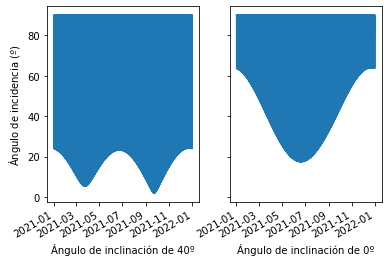

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)
aoi_40.plot(ax=ax1)
aoi_0.plot(ax=ax2)


ax1.set_xlabel('Ángulo de inclinación de 40º')
ax2.set_xlabel('Ángulo de inclinación de 0º')
ax1.set_ylabel('Ángulo de incidencia ($º$)')


plt.show()

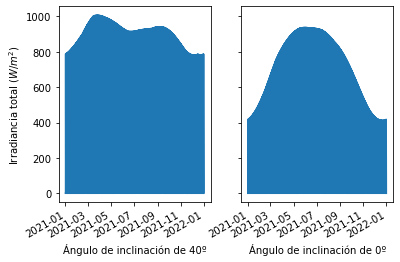

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)
Irradiance_40.plot(ax=ax1)
Irradiance_0.plot(ax=ax2)

ax1.set_xlabel('Ángulo de inclinación de 40º')
ax2.set_xlabel('Ángulo de inclinación de 0º')
ax1.set_ylabel('Irradiancia total ($W/m^2$)')



plt.show()

Para mejor comprensión, debido a la necesidad de estudio más específica de las horas sol pico se dividen los datos en meses

In [20]:
def hsp_mensual(hsp):
    enero=[]
    febrero=[]
    marzo=[]
    abril=[]
    mayo=[]
    junio=[]
    julio=[]
    agosto=[]
    septiembre=[]
    octubre=[]
    noviembre=[]
    diciembre=[]
    for i in range(len(hsp)):
        if i<31:
            enero.append(hsp[i])
        elif i<59:
            febrero.append(hsp[i])    
        elif i<90:
            marzo.append(hsp[i])
        elif i<120:
            abril.append(hsp[i])
        elif i<151:
            mayo.append(hsp[i])
        elif i<181:
            junio.append(hsp[i])
        elif i<212:
            julio.append(hsp[i])
        elif i<243:
            agosto.append(hsp[i])
        elif i<273:
            septiembre.append(hsp[i])
        elif i<304:
            octubre.append(hsp[i])
        elif i<334:
            noviembre.append(hsp[i])
        else:
            diciembre.append(hsp[i])
        
        HSP=[sum(enero)/31,sum(febrero)/28,sum(marzo)/31,sum(abril)/30,sum(mayo)/31,sum(junio)/30,sum(julio)/31,sum(agosto)/31,sum(septiembre)/30,sum(octubre)/31,sum(noviembre)/30,sum(diciembre)/31]
    return HSP

In [21]:
hsp_mensual_40=hsp_mensual(hsp_40)
hsp_mensual_0=hsp_mensual(hsp_0)

In [22]:
mes=['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre']
for i in range(0,12,1):
    print("Media HSP en "+mes[i]+' '+str(hsp_mensual_40[i])+" para angulo de inclinacion 40º")
print("\n")
for i in range(0,12,1):
    print("Media HSP en "+mes[i]+' '+str(hsp_mensual_0[i])+" para angulo de inclinacion 0º")

Media HSP en enero 4.912616794204728 para angulo de inclinacion 40º
Media HSP en febrero 5.930386375569241 para angulo de inclinacion 40º
Media HSP en marzo 7.018434612833127 para angulo de inclinacion 40º
Media HSP en abril 7.325077695565274 para angulo de inclinacion 40º
Media HSP en mayo 7.257682371582324 para angulo de inclinacion 40º
Media HSP en junio 7.077711851862201 para angulo de inclinacion 40º
Media HSP en julio 7.066519337408715 para angulo de inclinacion 40º
Media HSP en agosto 6.919938354449642 para angulo de inclinacion 40º
Media HSP en septiembre 6.59193598129562 para angulo de inclinacion 40º
Media HSP en octubre 5.801061927040392 para angulo de inclinacion 40º
Media HSP en noviembre 4.847038244030062 para angulo de inclinacion 40º
Media HSP en diciembre 4.527387674301893 para angulo de inclinacion 40º


Media HSP en enero 2.60497691787443 para angulo de inclinacion 0º
Media HSP en febrero 3.735014270872199 para angulo de inclinacion 0º
Media HSP en marzo 5.3583878556

También lo representamos de forma gráfica

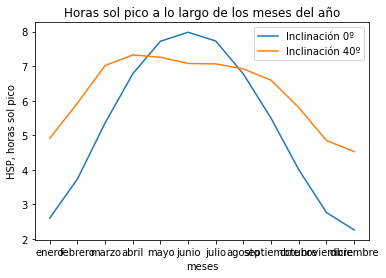

In [23]:
plt.plot(mes,hsp_mensual_0,label="Inclinación 0º")   
plt.plot(mes,hsp_mensual_40,label="Inclinación 40º")
plt.xlabel('meses')
plt.ylabel('HSP, horas sol pico')
plt.title("Horas sol pico a lo largo de los meses del año")
plt.legend()
plt.show()